In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder


In [2]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder


In [3]:
df=pd.read_csv("car data.csv")


In [4]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
df.tail()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [6]:
df.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Driven_kms         int64
Fuel_Type         object
Selling_type      object
Transmission      object
Owner              int64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [8]:
df.isnull()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
296,False,False,False,False,False,False,False,False,False
297,False,False,False,False,False,False,False,False,False
298,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False


In [9]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [10]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
296    False
297    False
298    False
299    False
300    False
Length: 301, dtype: bool

In [11]:
df.duplicated().sum()

2

In [12]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [14]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


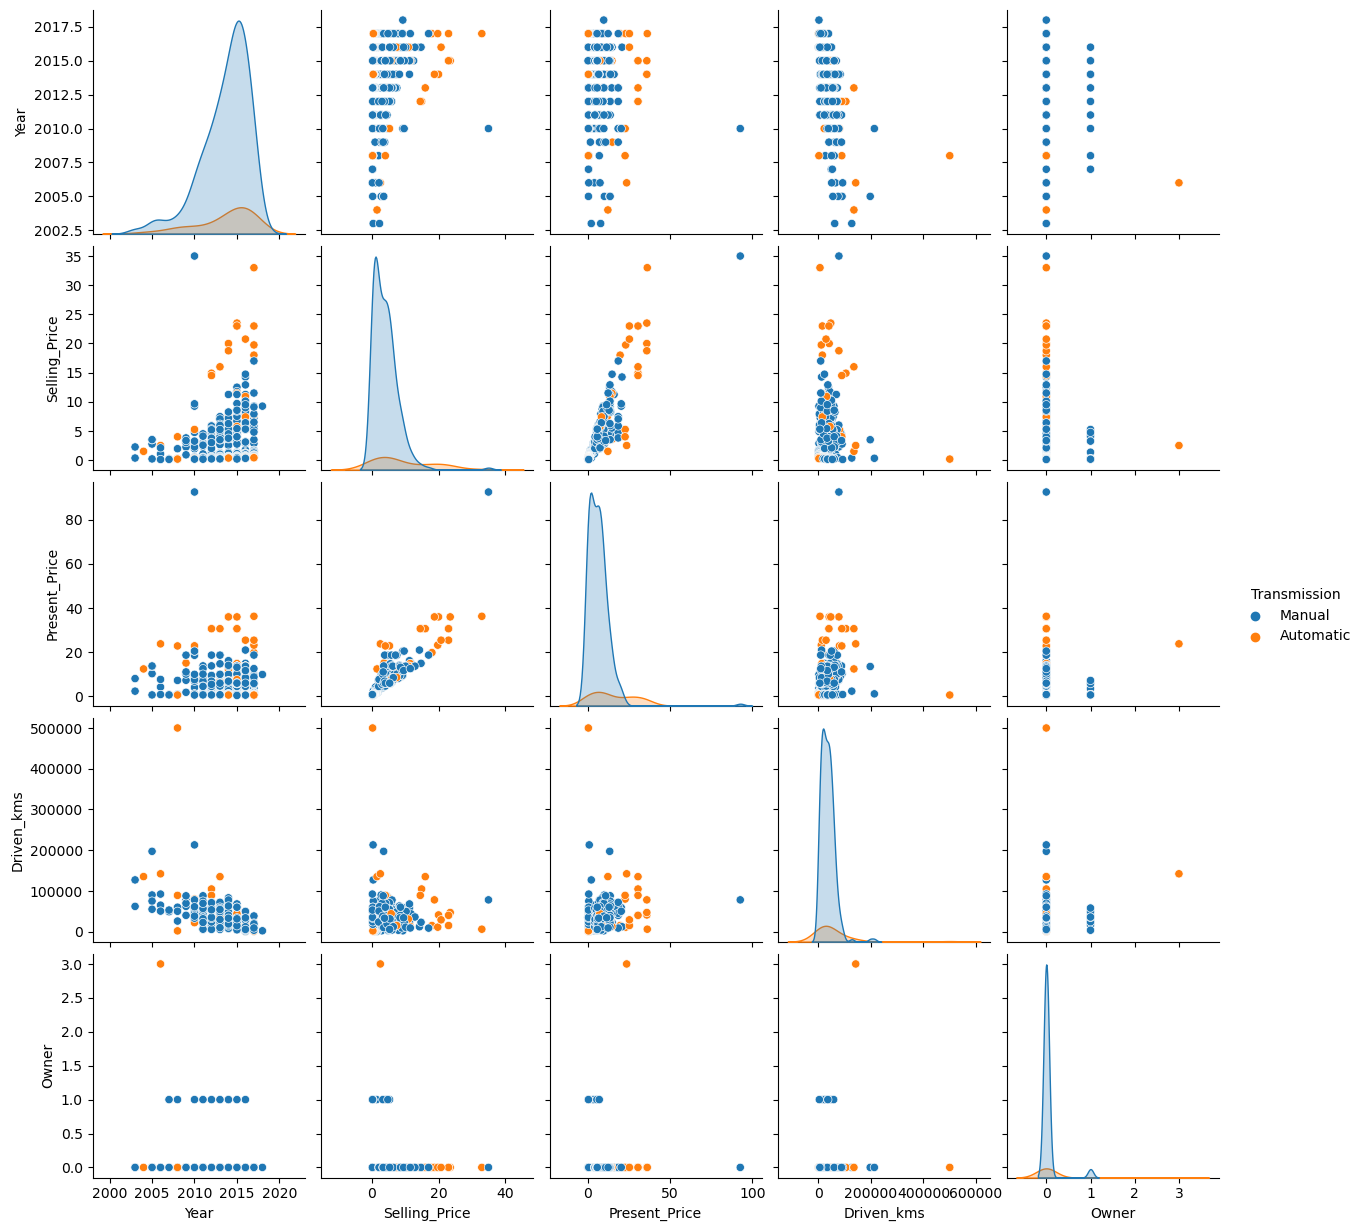

In [15]:
sns.pairplot(data=df, hue='Transmission')

<Axes: xlabel='Selling_Price', ylabel='Count'>

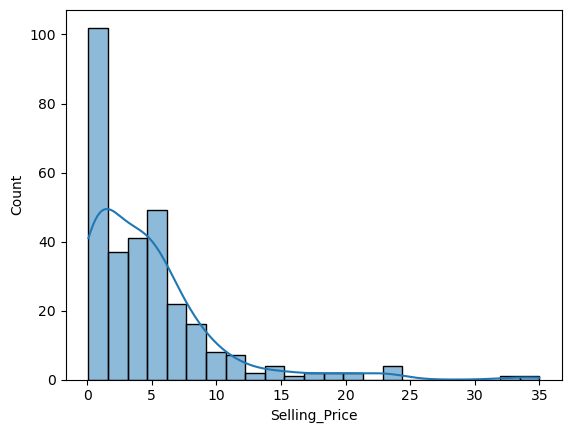

In [16]:
sns.histplot(df['Selling_Price'],kde=True)

In [17]:
X= df['Present_Price'].values.reshape(-1,1)
y=df['Selling_Price'].values.reshape(-1,1)

In [18]:
print(X)

[[ 5.59 ]
 [ 9.54 ]
 [ 9.85 ]
 [ 4.15 ]
 [ 6.87 ]
 [ 9.83 ]
 [ 8.12 ]
 [ 8.61 ]
 [ 8.89 ]
 [ 8.92 ]
 [ 3.6  ]
 [10.38 ]
 [ 9.94 ]
 [ 7.71 ]
 [ 7.21 ]
 [10.79 ]
 [10.79 ]
 [10.79 ]
 [ 5.09 ]
 [ 7.98 ]
 [ 3.95 ]
 [ 5.71 ]
 [ 8.01 ]
 [ 3.46 ]
 [ 4.41 ]
 [ 4.99 ]
 [ 5.87 ]
 [ 6.49 ]
 [ 3.95 ]
 [10.38 ]
 [ 5.98 ]
 [ 4.89 ]
 [ 7.49 ]
 [ 9.95 ]
 [ 8.06 ]
 [ 7.74 ]
 [ 7.2  ]
 [ 2.28 ]
 [ 3.76 ]
 [ 7.98 ]
 [ 7.87 ]
 [ 3.98 ]
 [ 7.15 ]
 [ 8.06 ]
 [ 2.69 ]
 [12.04 ]
 [ 4.89 ]
 [ 4.15 ]
 [ 7.71 ]
 [ 9.29 ]
 [30.61 ]
 [30.61 ]
 [19.77 ]
 [30.61 ]
 [10.21 ]
 [15.04 ]
 [ 7.27 ]
 [18.54 ]
 [ 6.8  ]
 [35.96 ]
 [18.61 ]
 [ 7.7  ]
 [35.96 ]
 [35.96 ]
 [36.23 ]
 [ 6.95 ]
 [23.15 ]
 [20.45 ]
 [13.74 ]
 [20.91 ]
 [ 6.76 ]
 [12.48 ]
 [18.61 ]
 [ 5.71 ]
 [ 8.93 ]
 [ 6.8  ]
 [14.68 ]
 [12.35 ]
 [22.83 ]
 [30.61 ]
 [14.89 ]
 [ 7.85 ]
 [25.39 ]
 [13.46 ]
 [13.46 ]
 [23.73 ]
 [92.6  ]
 [13.74 ]
 [ 6.05 ]
 [ 6.76 ]
 [18.61 ]
 [16.09 ]
 [13.7  ]
 [30.61 ]
 [22.78 ]
 [18.61 ]
 [25.39 ]
 [18.64 ]
 [18.61 ]
 [20.45 ]


In [19]:
print(y)

[[ 3.35]
 [ 4.75]
 [ 7.25]
 [ 2.85]
 [ 4.6 ]
 [ 9.25]
 [ 6.75]
 [ 6.5 ]
 [ 8.75]
 [ 7.45]
 [ 2.85]
 [ 6.85]
 [ 7.5 ]
 [ 6.1 ]
 [ 2.25]
 [ 7.75]
 [ 7.25]
 [ 7.75]
 [ 3.25]
 [ 2.65]
 [ 2.85]
 [ 4.9 ]
 [ 4.4 ]
 [ 2.5 ]
 [ 2.9 ]
 [ 3.  ]
 [ 4.15]
 [ 6.  ]
 [ 1.95]
 [ 7.45]
 [ 3.1 ]
 [ 2.35]
 [ 4.95]
 [ 6.  ]
 [ 5.5 ]
 [ 2.95]
 [ 4.65]
 [ 0.35]
 [ 3.  ]
 [ 2.25]
 [ 5.85]
 [ 2.55]
 [ 1.95]
 [ 5.5 ]
 [ 1.25]
 [ 7.5 ]
 [ 2.65]
 [ 1.05]
 [ 5.8 ]
 [ 7.75]
 [14.9 ]
 [23.  ]
 [18.  ]
 [16.  ]
 [ 2.75]
 [ 3.6 ]
 [ 4.5 ]
 [ 4.75]
 [ 4.1 ]
 [19.99]
 [ 6.95]
 [ 4.5 ]
 [18.75]
 [23.5 ]
 [33.  ]
 [ 4.75]
 [19.75]
 [ 9.25]
 [ 4.35]
 [14.25]
 [ 3.95]
 [ 4.5 ]
 [ 7.45]
 [ 2.65]
 [ 4.9 ]
 [ 3.95]
 [ 5.5 ]
 [ 1.5 ]
 [ 5.25]
 [14.5 ]
 [14.73]
 [ 4.75]
 [23.  ]
 [12.5 ]
 [ 3.49]
 [ 2.5 ]
 [35.  ]
 [ 5.9 ]
 [ 3.45]
 [ 4.75]
 [ 3.8 ]
 [11.25]
 [ 3.51]
 [23.  ]
 [ 4.  ]
 [ 5.85]
 [20.75]
 [17.  ]
 [ 7.05]
 [ 9.65]
 [ 1.75]
 [ 1.7 ]
 [ 1.65]
 [ 1.45]
 [ 1.35]
 [ 1.35]
 [ 1.35]
 [ 1.25]
 [ 1.2 ]
 [ 1.2 ]
 [ 1.2 ]
 

In [20]:
df.shape

(301, 9)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)


In [22]:
X_train.shape

(210, 1)

In [23]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (210, 1)
y_train shape: (210, 1)
X_test shape: (91, 1)
y_test shape: (91, 1)


In [24]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [25]:
train_pred=model.predict(X_train)

In [26]:
from sklearn import metrics

error_score=metrics.r2_score(y_train, train_pred)
print("R squared error:",error_score)

R squared error: 0.7723210254492384


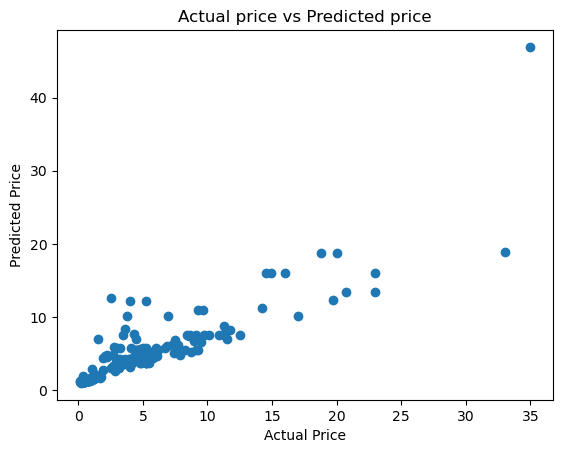

In [27]:
plt.scatter(y_train,train_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual price vs Predicted price")
plt.show()

In [28]:
from sklearn.linear_model import Lasso 
lass_model=Lasso()
lass_model.fit(X_train,y_train)

Lasso()

In [29]:
train_pred=lass_model.predict(X_train)

In [30]:
error_score=metrics.r2_score(y_train, train_pred)
print("R squared error:",error_score)

R squared error: 0.7719278130399667


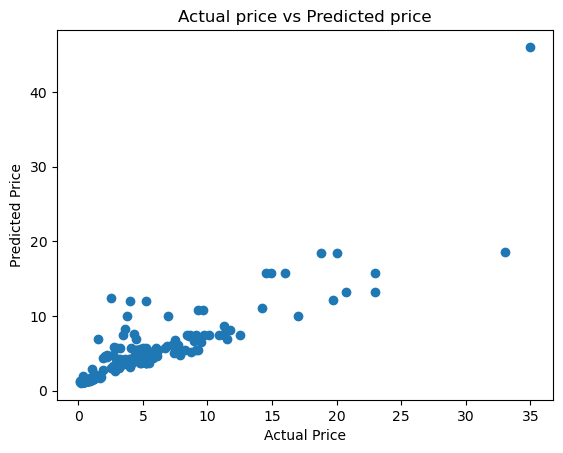

In [31]:
plt.scatter(y_train,train_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual price vs Predicted price")
plt.show()

In [32]:
test_pred=lass_model.predict(X_test)

In [33]:
error_score=metrics.r2_score(y_test, test_pred)
print("R squared error:",error_score)

R squared error: 0.7623734036921923


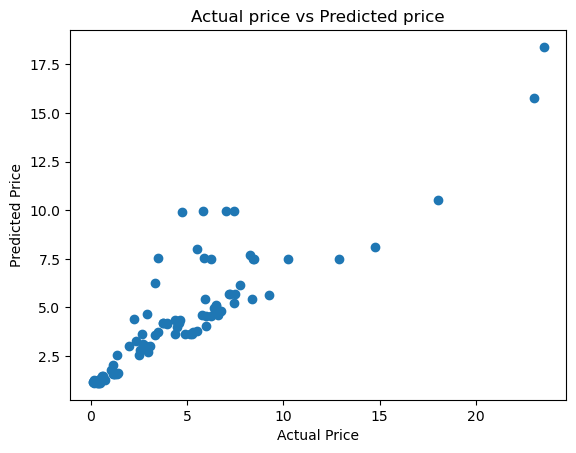

In [34]:
plt.scatter(y_test,test_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual price vs Predicted price")
plt.show()